In [1]:
import pandas as pd
import numpy as np
import sonny_acquire
import prepare
import acquire

In [2]:
df = pd.read_csv('all_repos_dict.csv')
df['category'] = 'unknown'
df.loc[:100, 'category'] = 'solar_energy'
df.loc[100:200, 'category'] = 'petroleum'
df.loc[200:, 'category'] = 'natural_gas'
df = df[['language','category','repo','readme_contents']]

In [3]:
df = prepare.prep_repo_data(df)

In [4]:
df

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized
0,Python,solar_energy,ColasGael/Machine-Learning-for-Solar-Energy-Pr...,# Machine-Learning-for-Solar-Energy-Prediction...,"[machinelearningforsolarenergyprediction, by, ...",machinelearningforsolarenergypredict adel kuzm...,machinelearningforsolarenergyprediction adele ...
1,Python,solar_energy,meltaxa/solariot,# Solariot\n\nLeverage your IoT enabled Solar ...,"[solariot, leverage, your, iot, enabled, solar...",solariot leverag iot enabl solar pv invert str...,solariot leverage iot enabled solar pv inverte...
2,Python,solar_energy,renewables-ninja/gsee,[![Master branch build status](https://img.shi...,"[master, branch, build, statushttpsimgshieldsi...",master branch build statushttpsimgshieldsioazu...,master branch build statushttpsimgshieldsioazu...
3,C++,solar_energy,3KUdelta/Solar_WiFi_Weather_Station,# Zambretti Forecaster on Solar WiFi Weather S...,"[zambretti, forecaster, on, solar, wifi, weath...",zambretti forecast solar wifi weather station ...,zambretti forecaster solar wifi weather statio...
4,R,solar_energy,ropensci/nasapower,\n[![R build status](https://github.com/ropens...,"[r, build, statushttpsgithubcomropenscinasapow...",r build statushttpsgithubcomropenscinasapowerw...,r build statushttpsgithubcomropenscinasapowerw...
...,...,...,...,...,...,...,...
294,Python,natural_gas,fernandessfae/Evolucao-da-producao-de-gas-natu...,# Projeto DataScience - Evolução da produção d...,"[projeto, datascience, evoluo, da, produo, de,...",projeto datasci evoluo da produo de gs natur p...,projeto datascience evoluo da produo de g natu...
296,NaN,natural_gas,chrord/Data_driven_Distributed_Operation_of_El...,# Data-driven Distributed Operation of Electri...,"[datadriven, distributed, operation, of, elect...",datadriven distribut oper electr natur ga syst...,datadriven distributed operation electricity n...
297,MATLAB,natural_gas,chaiitanyasangani88/OperationalFlowRateVariation,# OperationalFlowCaseStudy\nA detailed study a...,"[operationalflowcasestudy, a, detailed, study,...",operationalflowcasestudi detail studi oper flo...,operationalflowcasestudy detailed study operat...
298,R,natural_gas,jaburney/naturalgastransition,## Coal-to-Natural Gas Transition Impacts Anal...,"[coaltonatural, gas, transition, impacts, anal...",coaltonatur ga transit impact analysi thi repo...,coaltonatural gas transition impact analysis r...


In [5]:
df.dropna(inplace=True)
df.drop(df.index[15], inplace=True)

In [6]:
df

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized
0,Python,solar_energy,ColasGael/Machine-Learning-for-Solar-Energy-Pr...,# Machine-Learning-for-Solar-Energy-Prediction...,"[machinelearningforsolarenergyprediction, by, ...",machinelearningforsolarenergypredict adel kuzm...,machinelearningforsolarenergyprediction adele ...
1,Python,solar_energy,meltaxa/solariot,# Solariot\n\nLeverage your IoT enabled Solar ...,"[solariot, leverage, your, iot, enabled, solar...",solariot leverag iot enabl solar pv invert str...,solariot leverage iot enabled solar pv inverte...
2,Python,solar_energy,renewables-ninja/gsee,[![Master branch build status](https://img.shi...,"[master, branch, build, statushttpsimgshieldsi...",master branch build statushttpsimgshieldsioazu...,master branch build statushttpsimgshieldsioazu...
3,C++,solar_energy,3KUdelta/Solar_WiFi_Weather_Station,# Zambretti Forecaster on Solar WiFi Weather S...,"[zambretti, forecaster, on, solar, wifi, weath...",zambretti forecast solar wifi weather station ...,zambretti forecaster solar wifi weather statio...
4,R,solar_energy,ropensci/nasapower,\n[![R build status](https://github.com/ropens...,"[r, build, statushttpsgithubcomropenscinasapow...",r build statushttpsgithubcomropenscinasapowerw...,r build statushttpsgithubcomropenscinasapowerw...
...,...,...,...,...,...,...,...
293,C++,natural_gas,reyhancaba/Natural-Gas-Detector-Circuit-Using-...,# Natural-Gas-Detector-Circuit-Using-An-Arduin...,"[naturalgasdetectorcircuitusinganarduinouno, b...",naturalgasdetectorcircuitusinganarduinouno bu ...,naturalgasdetectorcircuitusinganarduinouno bu ...
294,Python,natural_gas,fernandessfae/Evolucao-da-producao-de-gas-natu...,# Projeto DataScience - Evolução da produção d...,"[projeto, datascience, evoluo, da, produo, de,...",projeto datasci evoluo da produo de gs natur p...,projeto datascience evoluo da produo de g natu...
297,MATLAB,natural_gas,chaiitanyasangani88/OperationalFlowRateVariation,# OperationalFlowCaseStudy\nA detailed study a...,"[operationalflowcasestudy, a, detailed, study,...",operationalflowcasestudi detail studi oper flo...,operationalflowcasestudy detailed study operat...
298,R,natural_gas,jaburney/naturalgastransition,## Coal-to-Natural Gas Transition Impacts Anal...,"[coaltonatural, gas, transition, impacts, anal...",coaltonatur ga transit impact analysi thi repo...,coaltonatural gas transition impact analysis r...


In [7]:
df.category.value_counts()

solar_energy    84
natural_gas     65
petroleum       64
Name: category, dtype: int64

In [8]:
#df = acquire.scrape_github_data()

In [9]:
#df

In [10]:
#df = pd.DataFrame(df)

In [11]:
#df

In [12]:
#df.dtypes

In [13]:
#df.head()

In [14]:
# prepare data
#df = prepare.prep_repo_data(df)

In [15]:
#df

In [16]:
#df.dtypes

In [17]:
#df.info()

In [18]:
#df.language.value_counts()

In [19]:
# plt.figure(figsize=(16,8))
# df.language.value_counts().head(15).plot.barh(width=.9, ec='black', title='15 most popular language  repos')
# plt.xlabel('Number of occurances')

## Exploration

- What are the most common words in READMEs?
- What does the distribution of IDFs look like for the most common words?
- Does the length of the README vary by programming language?
- Do different programming languages use a different number of unique words?

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import nltk.sentiment
import re

Text(0.5, 0, 'Number of occurances')

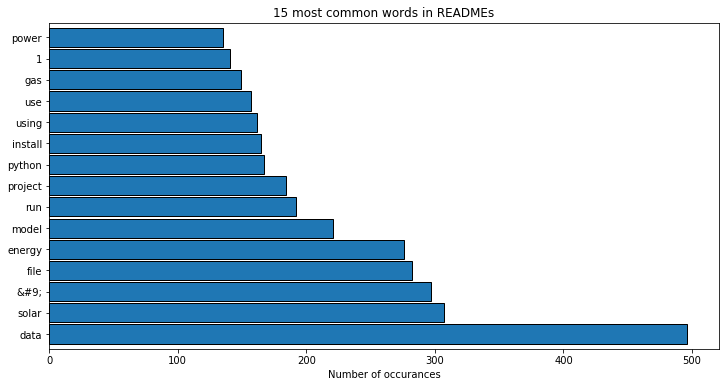

In [21]:
# What are the most common words in READMEs?
all_words = ' '.join(df.clean_lemmatized).split()
plt.figure(figsize=(12,6))
pd.Series(all_words).value_counts().head(15).plot.barh(width=.9, ec='black', title='15 most common words in READMEs')
plt.xlabel('Number of occurances')

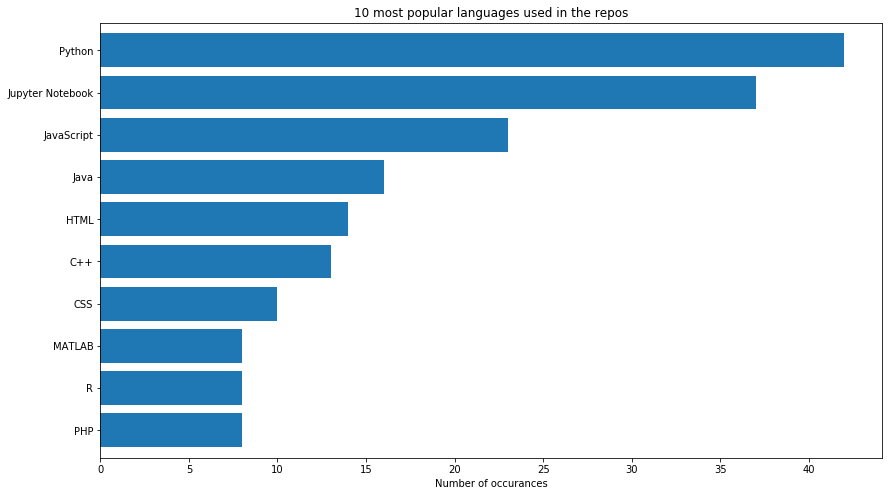

In [22]:
plt.figure(figsize=(14,8))
df.language.value_counts().sort_values(ascending=True).tail(10).plot.barh(width=.8)
plt.title('10 most popular languages used in the repos')
plt.xlabel('Number of occurances')
plt.show()

In [23]:
# We will use this function to calculate the IDF of each word
def idf(word):
    n_occurrences = sum([1 for doc in df.cleaned if word in doc])
    n_docs = len(df.cleaned)
    idf = np.log(n_docs/n_occurrences)
    return idf

In [24]:
# Find the unique words in the entire df to calculate the IDF
unique_words = pd.Series(' '.join(df.clean_lemmatized).split()).unique()

In [25]:
unique_words

array(['machinelearningforsolarenergyprediction', 'adele', 'kuzmiakova',
       ..., 'oilprice', 'wti', 'brent'], dtype=object)

In [26]:
df.head()

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized
0,Python,solar_energy,ColasGael/Machine-Learning-for-Solar-Energy-Pr...,# Machine-Learning-for-Solar-Energy-Prediction...,"[machinelearningforsolarenergyprediction, by, ...",machinelearningforsolarenergypredict adel kuzm...,machinelearningforsolarenergyprediction adele ...
1,Python,solar_energy,meltaxa/solariot,# Solariot\n\nLeverage your IoT enabled Solar ...,"[solariot, leverage, your, iot, enabled, solar...",solariot leverag iot enabl solar pv invert str...,solariot leverage iot enabled solar pv inverte...
2,Python,solar_energy,renewables-ninja/gsee,[![Master branch build status](https://img.shi...,"[master, branch, build, statushttpsimgshieldsi...",master branch build statushttpsimgshieldsioazu...,master branch build statushttpsimgshieldsioazu...
3,C++,solar_energy,3KUdelta/Solar_WiFi_Weather_Station,# Zambretti Forecaster on Solar WiFi Weather S...,"[zambretti, forecaster, on, solar, wifi, weath...",zambretti forecast solar wifi weather station ...,zambretti forecaster solar wifi weather statio...
4,R,solar_energy,ropensci/nasapower,\n[![R build status](https://github.com/ropens...,"[r, build, statushttpsgithubcomropenscinasapow...",r build statushttpsgithubcomropenscinasapowerw...,r build statushttpsgithubcomropenscinasapowerw...


- Does the length of the README vary by programming language?

In [27]:
#feature engineering, add a new feature as clean_lemmatized_length
df["clean_lemmatized_length"] = df.clean_lemmatized.apply(len)

In [28]:
df

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized,clean_lemmatized_length
0,Python,solar_energy,ColasGael/Machine-Learning-for-Solar-Energy-Pr...,# Machine-Learning-for-Solar-Energy-Prediction...,"[machinelearningforsolarenergyprediction, by, ...",machinelearningforsolarenergypredict adel kuzm...,machinelearningforsolarenergyprediction adele ...,993
1,Python,solar_energy,meltaxa/solariot,# Solariot\n\nLeverage your IoT enabled Solar ...,"[solariot, leverage, your, iot, enabled, solar...",solariot leverag iot enabl solar pv invert str...,solariot leverage iot enabled solar pv inverte...,3246
2,Python,solar_energy,renewables-ninja/gsee,[![Master branch build status](https://img.shi...,"[master, branch, build, statushttpsimgshieldsi...",master branch build statushttpsimgshieldsioazu...,master branch build statushttpsimgshieldsioazu...,1613
3,C++,solar_energy,3KUdelta/Solar_WiFi_Weather_Station,# Zambretti Forecaster on Solar WiFi Weather S...,"[zambretti, forecaster, on, solar, wifi, weath...",zambretti forecast solar wifi weather station ...,zambretti forecaster solar wifi weather statio...,2501
4,R,solar_energy,ropensci/nasapower,\n[![R build status](https://github.com/ropens...,"[r, build, statushttpsgithubcomropenscinasapow...",r build statushttpsgithubcomropenscinasapowerw...,r build statushttpsgithubcomropenscinasapowerw...,3866
...,...,...,...,...,...,...,...,...
293,C++,natural_gas,reyhancaba/Natural-Gas-Detector-Circuit-Using-...,# Natural-Gas-Detector-Circuit-Using-An-Arduin...,"[naturalgasdetectorcircuitusinganarduinouno, b...",naturalgasdetectorcircuitusinganarduinouno bu ...,naturalgasdetectorcircuitusinganarduinouno bu ...,420
294,Python,natural_gas,fernandessfae/Evolucao-da-producao-de-gas-natu...,# Projeto DataScience - Evolução da produção d...,"[projeto, datascience, evoluo, da, produo, de,...",projeto datasci evoluo da produo de gs natur p...,projeto datascience evoluo da produo de g natu...,3532
297,MATLAB,natural_gas,chaiitanyasangani88/OperationalFlowRateVariation,# OperationalFlowCaseStudy\nA detailed study a...,"[operationalflowcasestudy, a, detailed, study,...",operationalflowcasestudi detail studi oper flo...,operationalflowcasestudy detailed study operat...,793
298,R,natural_gas,jaburney/naturalgastransition,## Coal-to-Natural Gas Transition Impacts Anal...,"[coaltonatural, gas, transition, impacts, anal...",coaltonatur ga transit impact analysi thi repo...,coaltonatural gas transition impact analysis r...,2065


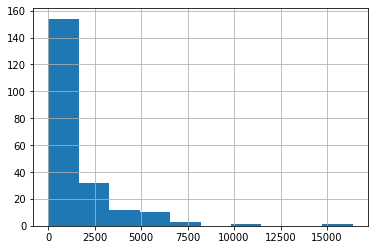

In [32]:
df.clean_lemmatized_length.hist()

In [70]:
# get top 10 popular languages
top_language = list(df.language.value_counts().head(10).index)
top_language
df[df.language.isin(top_lang)].language

0          Python
1          Python
2          Python
3             C++
4               R
          ...    
293           C++
294        Python
297        MATLAB
298             R
299    JavaScript
Name: language, Length: 179, dtype: object

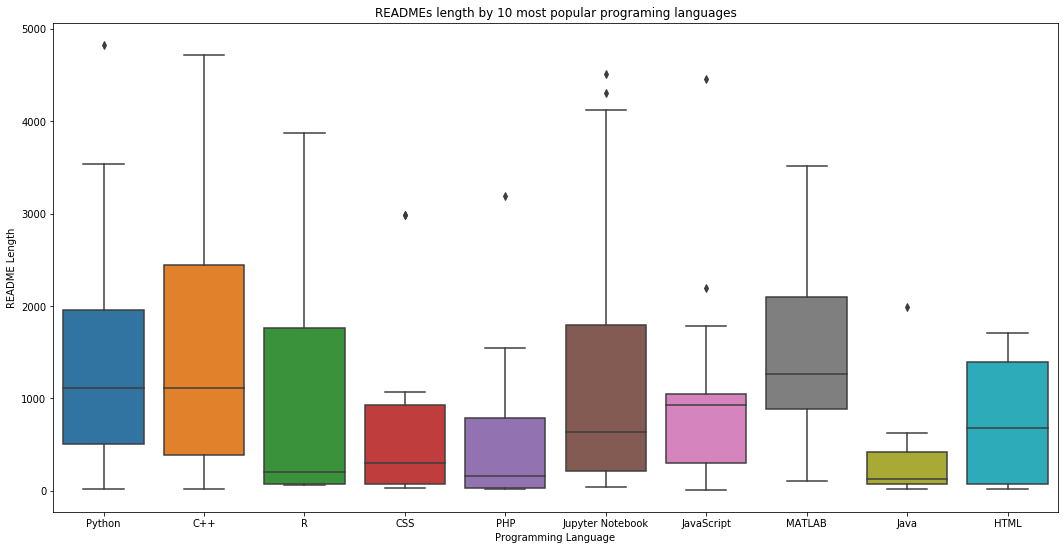

In [72]:
plt.figure(figsize=(18,9))
sns.boxplot(y=df[df.clean_lemmatized_length < 5000].clean_lemmatized_length, x=df[df.language.isin(top_language)].language)
plt.title("READMEs length by 10 most popular programing languages")
plt.xlabel('Programming Language')
plt.ylabel('README Length')
plt.show()

Text(0.5, 0, 'Number of occurances')

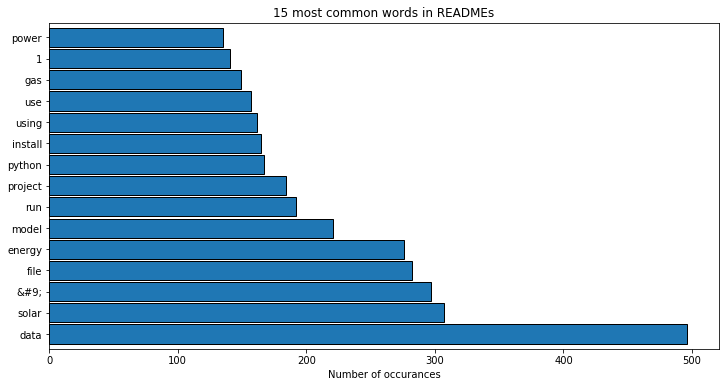

In [74]:
# What are the most common words in READMEs?
all_words = ' '.join(df.clean_lemmatized).split()
plt.figure(figsize=(12,6))
pd.Series(all_words).value_counts().head(15).plot.barh(width=.9, ec='black', title='15 most common words in READMEs')
plt.xlabel('Number of occurances')